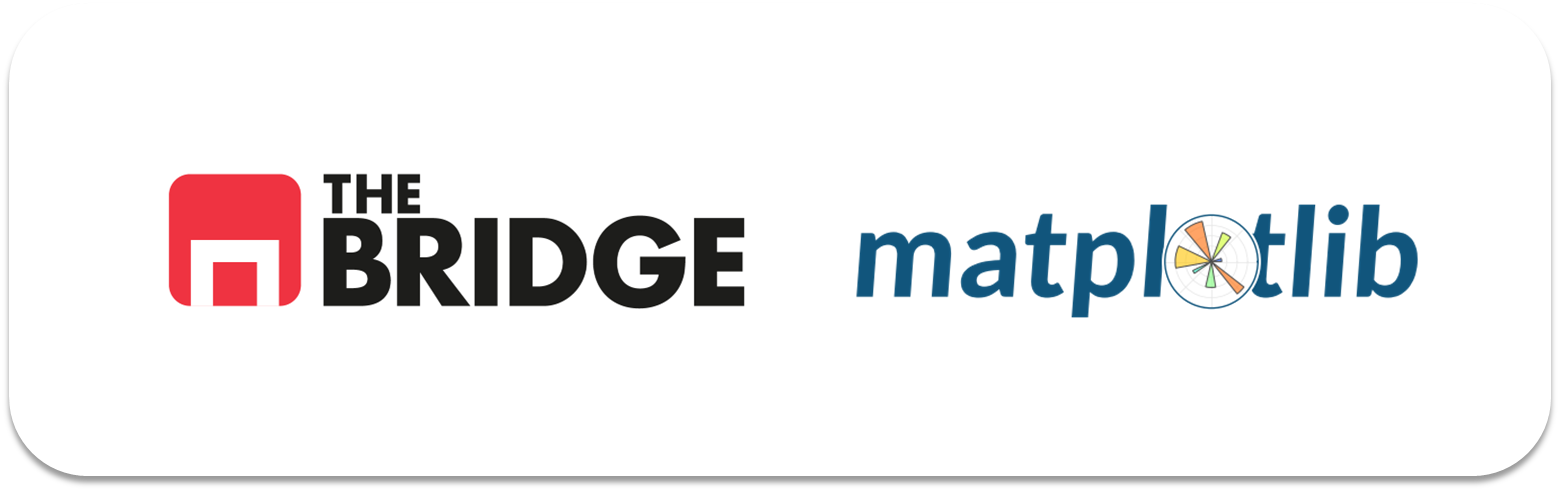

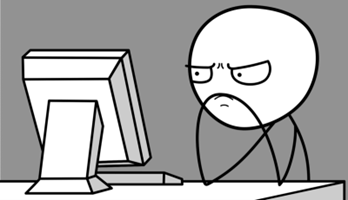

Para ejercitarte y afianzar lo aprendido sobre gráficas de Matplotlib, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


### Ejercicio 1


Carga tu qerido dataset del titanic, en la ruta "./data/titanic.csv", no hace falta que hagas limpieza.

In [2]:
data = pd.read_csv("./data/titanic.csv")

### Ejercicio 2



Crea el histograma de la variable `age` de forma que se reproduzca la siguiente figura (tiene 30 bines)

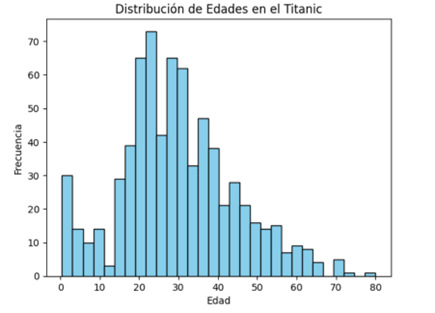

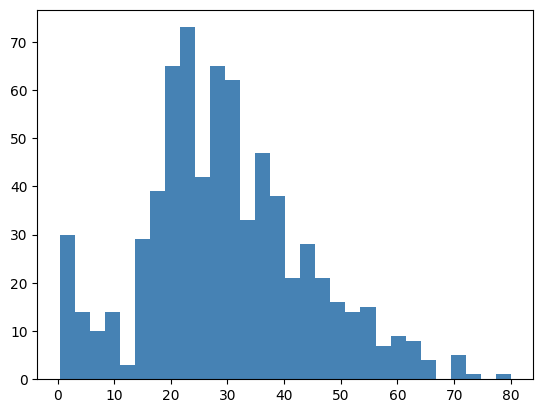

In [5]:
plt.hist(data["age"],
         bins = 30,
         alpha = 1,
         color = "steelblue"
);


### Ejercicio 3

¿Cuáles son los 3 intervalos de valores con mayor número de viajeros según el gráfico anterior? ¿Obtén también el número de viajeros en cada uno?

In [7]:
edades = data["age"].dropna() #eliminamos nulos y creamos variable edades
frecuencias, bordes = np.histogram(edades, bins=30) #creamos el histograma con numpy

intervalos = [(bordes[i], bordes[i+1]) for i in range(len(bordes)-1)] #creamos los intervalos

datos = list(zip(intervalos, frecuencias)) #emparejamos frecuencias con intervalos

datos_ordenados = sorted(datos, key=lambda x: x[1], reverse=True) #ordenamos de mayor a menor

for i in range(3): #mostrmaos los tres intervalos con más pasajeros
    intervalo, frecuencia = datos_ordenados[i]
    print(f"Intervalo {intervalo[0]:.2f} - {intervalo[1]:.2f}: {frecuencia} viajeros")

Intervalo 21.64 - 24.29: 73 viajeros
Intervalo 18.99 - 21.64: 65 viajeros
Intervalo 26.95 - 29.60: 65 viajeros


### Ejercicio 4

Obten el diagrama de caja del precio del billete usando las funciones de matplotlib y reproduciendo la siguiente figura (tendrás que bucear un poco en los parámetros, y usar patch_artist = True, el tamaño de los bigotes está ajustado a 3 IQRs):

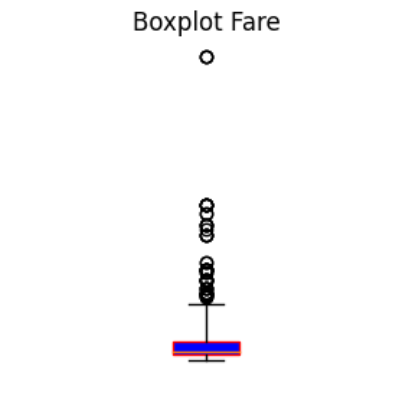

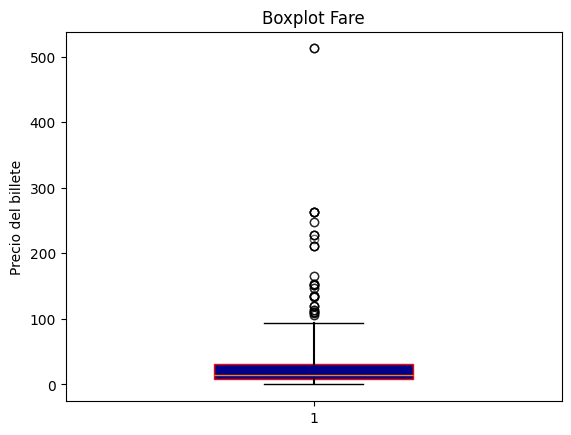

In [9]:
fare = data["fare"].dropna()

fig, ax = plt.subplots()

bp = ax.boxplot(fare,
                patch_artist=True,
                widths= 0.4,
                whis= 3)

for box in bp['boxes']:
    box.set(facecolor='darkblue', edgecolor='red')

for whisker in bp['whiskers']:
    whisker.set(color='black', linewidth=1.5)

for flier in bp['fliers']:
    flier.set(marker='o', color='black', alpha=0.6)

ax.set_title("Boxplot Fare")
ax.set_ylabel("Precio del billete")

plt.show()

### Ejercicio 5

Crea el gráfico de frecuencias absolutas y relativas de las ciudades de embarque del Titanic de forma que repodruzcan la siguiente figura:

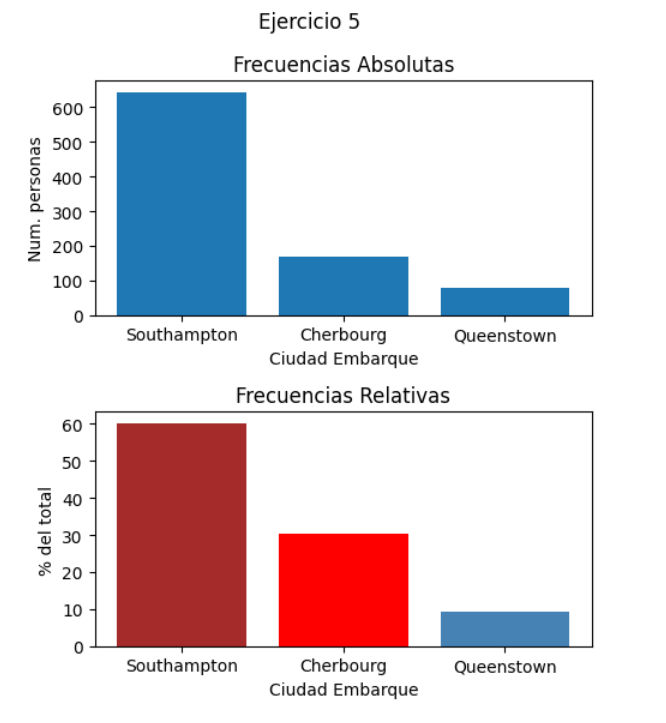

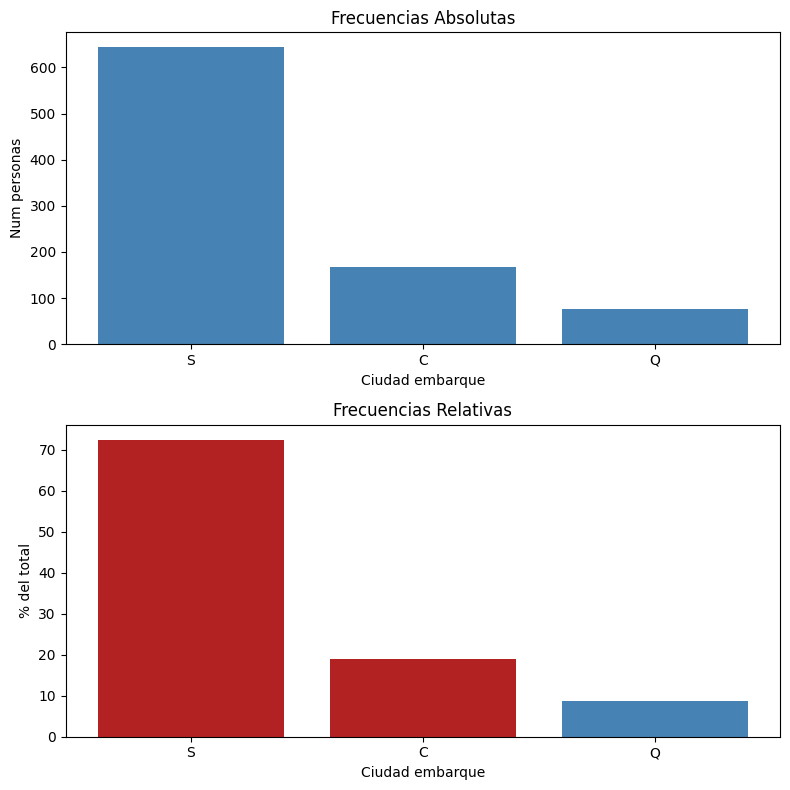

In [12]:
embarked = data["embarked"].dropna()

frecuencias_abs = embarked.value_counts()
frecuencias_rel = embarked.value_counts(normalize=True) * 100

#Figura con dos subgráficas (una fija, dos ejes)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))

#Frecuencias absolutas
ax1.bar(frecuencias_abs.index, frecuencias_abs.values, color='steelblue')
ax1.set_title("Frecuencias Absolutas")
ax1.set_ylabel("Num personas")
ax1.set_xlabel("Ciudad embarque")

#Frecuencias relativas
colores_rel = ['firebrick', 'firebrick', 'steelblue']
ax2.bar(frecuencias_rel.index, frecuencias_rel.values, color=colores_rel)
ax2.set_title("Frecuencias Relativas")
ax2.set_ylabel("% del total")
ax2.set_xlabel("Ciudad embarque")

#Espacio entre subplots
plt.tight_layout()

plt.show()

### Ejercicio 6

Crea el gráfico de dispersión entre el precio y la edad, de forma que reproduzca el siguiente gráfico (tendrás que emplear el argumento alpa)

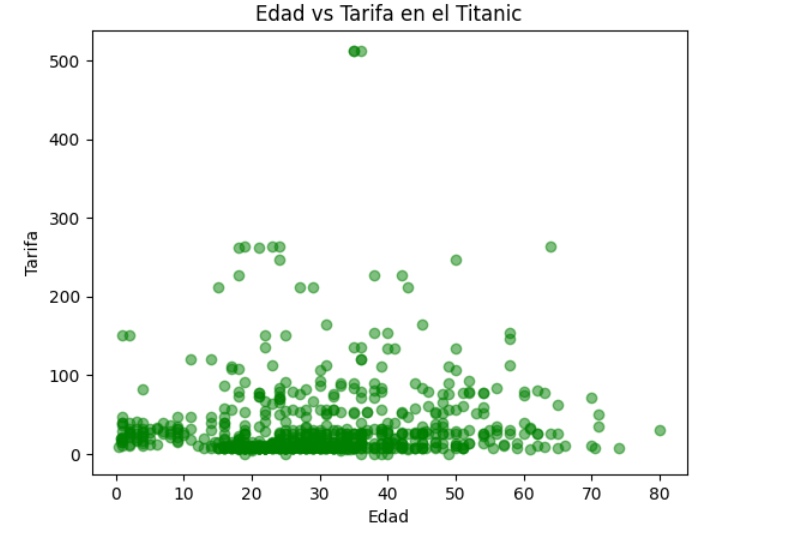

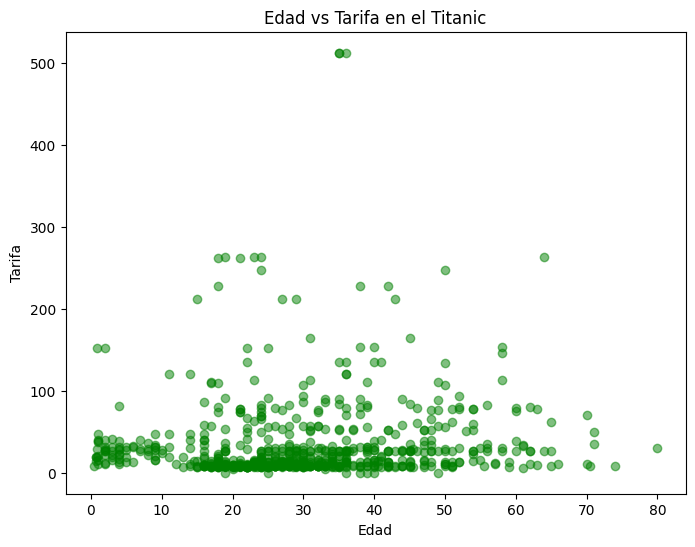

In [15]:
data_2 = data[["age", "fare"]].dropna()

plt.figure(figsize=(8,6))
plt.scatter(data_2["age"], data_2["fare"], color='green', alpha=0.5)

plt.title("Edad vs Tarifa en el Titanic")
plt.xlabel("Edad")
plt.ylabel("Tarifa")

plt.show()

### Ejercicio 7

Vamos a obtener el precio medio por edad, de la siguiente forma agrupa por edad y calcula la media de la tarifa, luego haz lo mismo pero calculando la desviación de estándar. Guarda los resultados en dos variables distintas.

In [ ]:
media_edad = data_2.groupby("age")["fare"].mean()

desviacion = data_2.groupby("age")["fare"].std()


### Ejercicio 8

Considerando las medias como un conjunto de medidas y las desviaciones como el error de las mismas construye un diagrama de errores que reproduzca la siguiente figura, usando (£) como moneda:

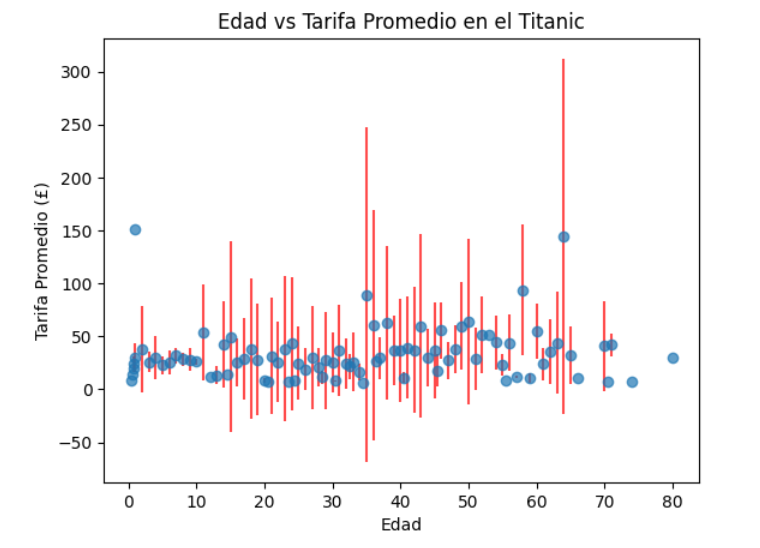

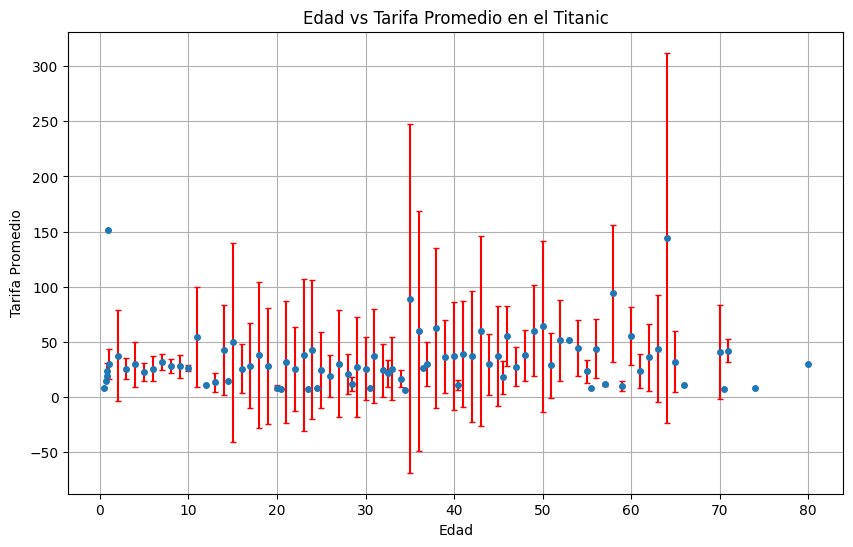

In [17]:
plt.figure(figsize=(10,6))

plt.errorbar(media_edad.index,
             media_edad.values,
             yerr=desviacion.values,
             fmt='o',
             ecolor='red',
             capsize=2,
             markersize=4,
             linestyle='none')

plt.title("Edad vs Tarifa Promedio en el Titanic")
plt.xlabel("Edad")
plt.ylabel("Tarifa Promedio")

plt.grid(True)
plt.show()


EXTRA: Pinta los cuatro primeros gráficos conjuntamente en una sóla figura como la que ves a continuación:

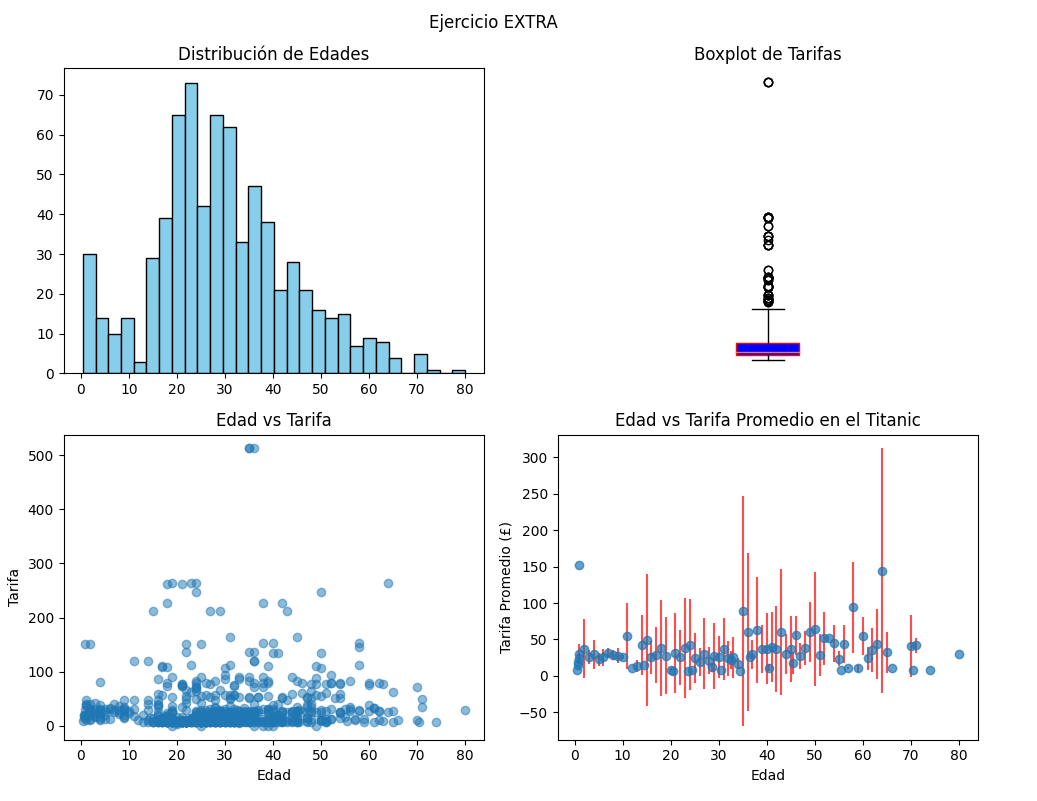

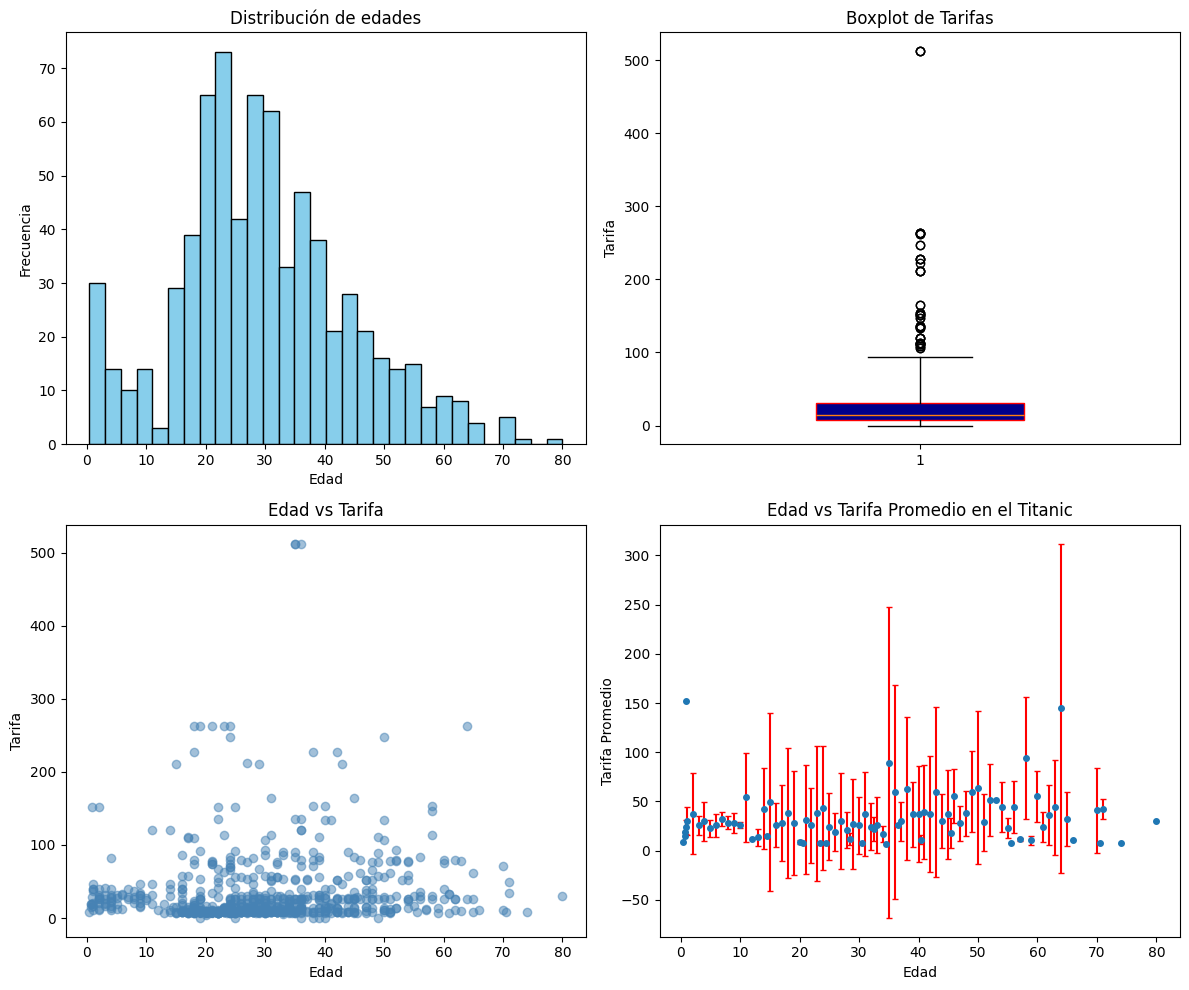

In [19]:
figs, axs = plt.subplots(2, 2, figsize=(12, 10))

#Subplot 1: Histograma de edades
axs[0, 0].hist(edades, bins=30, color='skyblue', edgecolor='black')
axs[0, 0].set_title("Distribución de edades")
axs[0, 0].set_xlabel("Edad")
axs[0, 0].set_ylabel("Frecuencia")

#Subplot 2: Boxplot de tarifas
bp = axs[0,1].boxplot(fare,
                patch_artist=True,
                widths= 0.4,
                whis= 3)

for box in bp['boxes']:
    box.set(facecolor='darkblue', edgecolor='red')
axs[0, 1].set_title("Boxplot de Tarifas")
axs[0, 1].set_ylabel("Tarifa")

#Subplot 3: Dispersión Edad vs Tarifa
axs[1, 0].scatter(data_2["age"], data_2["fare"], color='steelblue', alpha=0.5)
axs[1, 0].set_title("Edad vs Tarifa")
axs[1, 0].set_xlabel("Edad")
axs[1, 0].set_ylabel("Tarifa")

#Subplot 4: Errobar Media y desviación
axs[1,1].errorbar(media_edad.index,
             media_edad.values,
             yerr=desviacion.values,
             fmt='o',
             ecolor='red',
             capsize=2,
             markersize=4,
             linestyle='none')

axs[1,1].set_title("Edad vs Tarifa Promedio en el Titanic")
axs[1,1].set_xlabel("Edad")
axs[1,1].set_ylabel("Tarifa Promedio")

plt.tight_layout()
plt.show()

